In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('./running_agents.csv', delimiter=',')

# Determine the number of wins per player in each game
def process_wins(df, player1, player2, dir1, dir2):
    game_name = "{:s} - {:s} | {:s} - {:s}".format(player1, player2, dir1, dir2)
    df1 = df.loc[df['name'] == game_name]
    
    # Games won by player1
    won1 = df1.loc[df1['score1'] > df1['score2']].shape[0]
    # Tied games
    tied = df1.loc[df1['score1'] == df1['score2']].shape[0]
    # Games won by player2
    won2 = df1.loc[df1['score1'] < df1['score2']].shape[0]
    
    pwon1 = round((won1 / 1000) * 100);
    pwon2 = round((won2/ 1000) * 100);
    ptied = round((tied / 1000) * 100);
    
    results = [game_name, won1, pwon1, won2, pwon2, tied, ptied]
    print(results)

process_wins(df, "Max", "Gain", "HORIZONTAL", "VERTICAL")
process_wins(df, "Max", "Gain", "VERTICAL", "HORIZONTAL")
process_wins(df, "Gain", "Max", "HORIZONTAL", "VERTICAL")
process_wins(df, "Gain", "Max", "VERTICAL", "HORIZONTAL")

process_wins(df, "Avg", "Gain", "HORIZONTAL", "VERTICAL")
process_wins(df, "Avg", "Gain", "VERTICAL", "HORIZONTAL")
process_wins(df, "Gain", "Avg", "HORIZONTAL", "VERTICAL")
process_wins(df, "Gain", "Avg", "VERTICAL", "HORIZONTAL")

process_wins(df, "Avg", "Max", "HORIZONTAL", "VERTICAL")
process_wins(df, "Avg", "Max", "VERTICAL", "HORIZONTAL")
process_wins(df, "Max", "Avg", "HORIZONTAL", "VERTICAL")
process_wins(df, "Max", "Avg", "VERTICAL", "HORIZONTAL")


['Max - Gain | HORIZONTAL - VERTICAL', 903, 90, 84, 8, 13, 1]
['Max - Gain | VERTICAL - HORIZONTAL', 910, 91, 79, 8, 11, 1]
['Gain - Max | HORIZONTAL - VERTICAL', 644, 64, 334, 33, 22, 2]
['Gain - Max | VERTICAL - HORIZONTAL', 659, 66, 319, 32, 22, 2]
['Avg - Gain | HORIZONTAL - VERTICAL', 999, 100, 0, 0, 1, 0]
['Avg - Gain | VERTICAL - HORIZONTAL', 1000, 100, 0, 0, 0, 0]
['Gain - Avg | HORIZONTAL - VERTICAL', 82, 8, 902, 90, 16, 2]
['Gain - Avg | VERTICAL - HORIZONTAL', 91, 9, 889, 89, 20, 2]
['Avg - Max | HORIZONTAL - VERTICAL', 983, 98, 7, 1, 10, 1]
['Avg - Max | VERTICAL - HORIZONTAL', 982, 98, 14, 1, 4, 0]
['Max - Avg | HORIZONTAL - VERTICAL', 216, 22, 735, 74, 49, 5]
['Max - Avg | VERTICAL - HORIZONTAL', 210, 21, 747, 75, 43, 4]


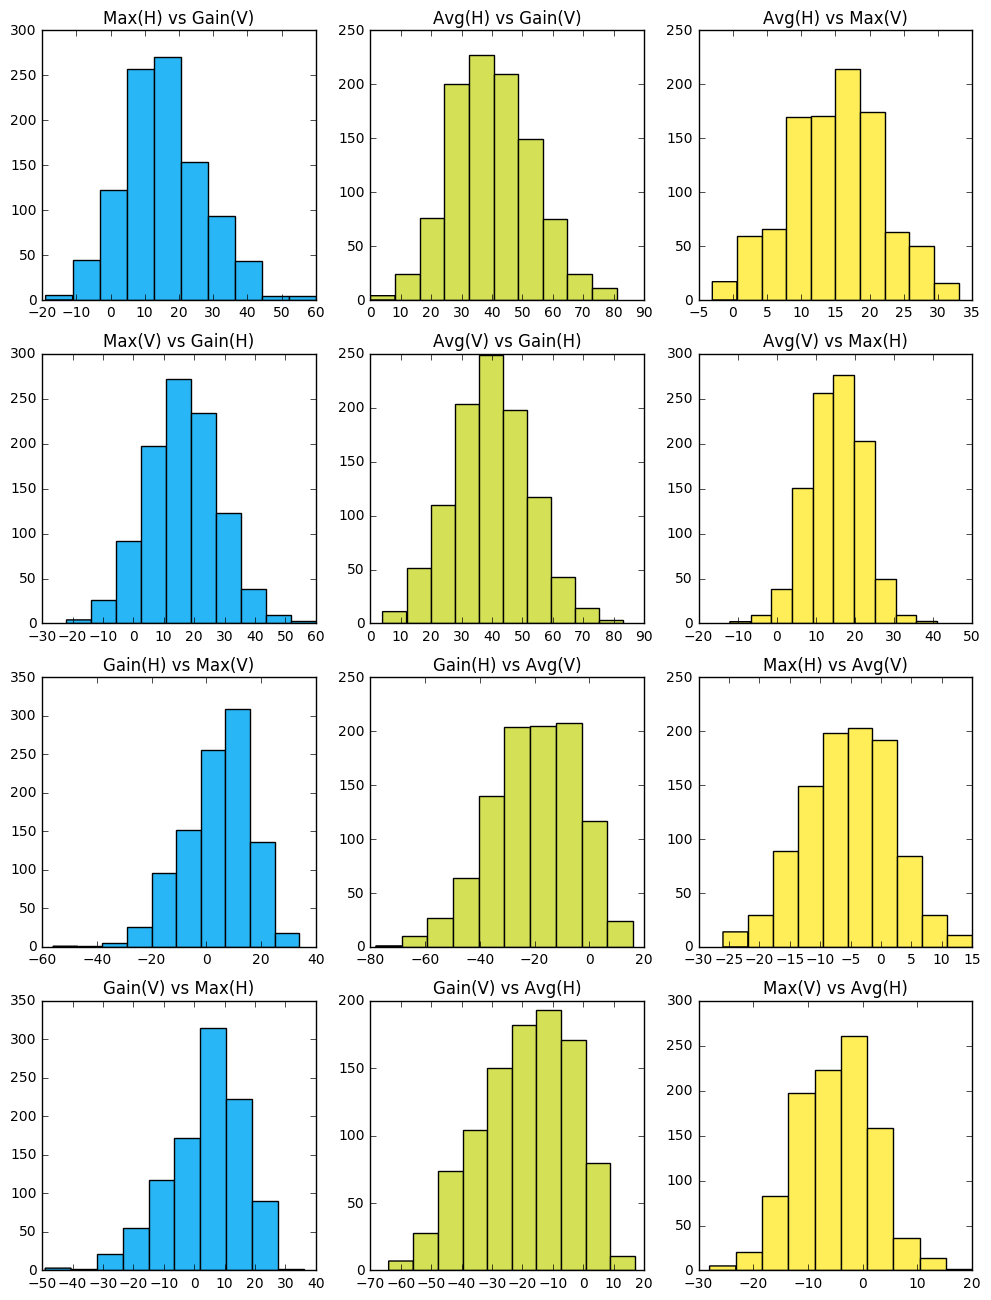

In [109]:
def process_scores_diff(df, player1, player2, dir1, dir2):
    game_name = "{:s} - {:s} | {:s} - {:s}".format(player1, player2, dir1, dir2)
    df1 = df.loc[df['name'] == game_name]
    
    diff = df1['score1'] - df1['score2']
    return diff.values

r1 = process_scores_diff(df, "Max", "Gain", "HORIZONTAL", "VERTICAL")
r2 = process_scores_diff(df, "Max", "Gain", "VERTICAL", "HORIZONTAL")
r3 = process_scores_diff(df, "Gain", "Max", "HORIZONTAL", "VERTICAL")
r4 = process_scores_diff(df, "Gain", "Max", "VERTICAL", "HORIZONTAL")

r5 = process_scores_diff(df, "Avg", "Gain", "HORIZONTAL", "VERTICAL")
r6 = process_scores_diff(df, "Avg", "Gain", "VERTICAL", "HORIZONTAL")
r7 = process_scores_diff(df, "Gain", "Avg", "HORIZONTAL", "VERTICAL")
r8 = process_scores_diff(df, "Gain", "Avg", "VERTICAL", "HORIZONTAL")

r9 = process_scores_diff(df, "Avg", "Max", "HORIZONTAL", "VERTICAL")
r10 = process_scores_diff(df, "Avg", "Max", "VERTICAL", "HORIZONTAL")
r11 = process_scores_diff(df, "Max", "Avg", "HORIZONTAL", "VERTICAL")
r12 = process_scores_diff(df, "Max", "Avg", "VERTICAL", "HORIZONTAL")

f, ax = plt.subplots(4, 3, figsize=(12, 16))

ax[0,0].hist(r1, color='#29B6F6')
ax[0,0].set_title("Max(H) vs Gain(V)")
ax[1,0].hist(r2, color='#29B6F6')
ax[1,0].set_title("Max(V) vs Gain(H)")
ax[2,0].hist(r3, color='#29B6F6')
ax[2,0].set_title("Gain(H) vs Max(V)")
ax[3,0].hist(r4, color='#29B6F6')
ax[3,0].set_title("Gain(V) vs Max(H)")

ax[0,1].hist(r5, color="#D4E157")
ax[0,1].set_title("Avg(H) vs Gain(V)")
ax[1,1].hist(r6, color="#D4E157")
ax[1,1].set_title("Avg(V) vs Gain(H)")
ax[2,1].hist(r7, color="#D4E157")
ax[2,1].set_title("Gain(H) vs Avg(V)")
ax[3,1].hist(r8, color="#D4E157")
ax[3,1].set_title("Gain(V) vs Avg(H)")

ax[0,2].hist(r9, color="#FFEE58")
ax[0,2].set_title("Avg(H) vs Max(V)")
ax[1,2].hist(r10, color="#FFEE58")
ax[1,2].set_title("Avg(V) vs Max(H)")
ax[2,2].hist(r11, color="#FFEE58")
ax[2,2].set_title("Max(H) vs Avg(V)")
ax[3,2].hist(r12, color="#FFEE58")
ax[3,2].set_title("Max(V) vs Avg(H)")

plt.savefig('./hist_scores.png')

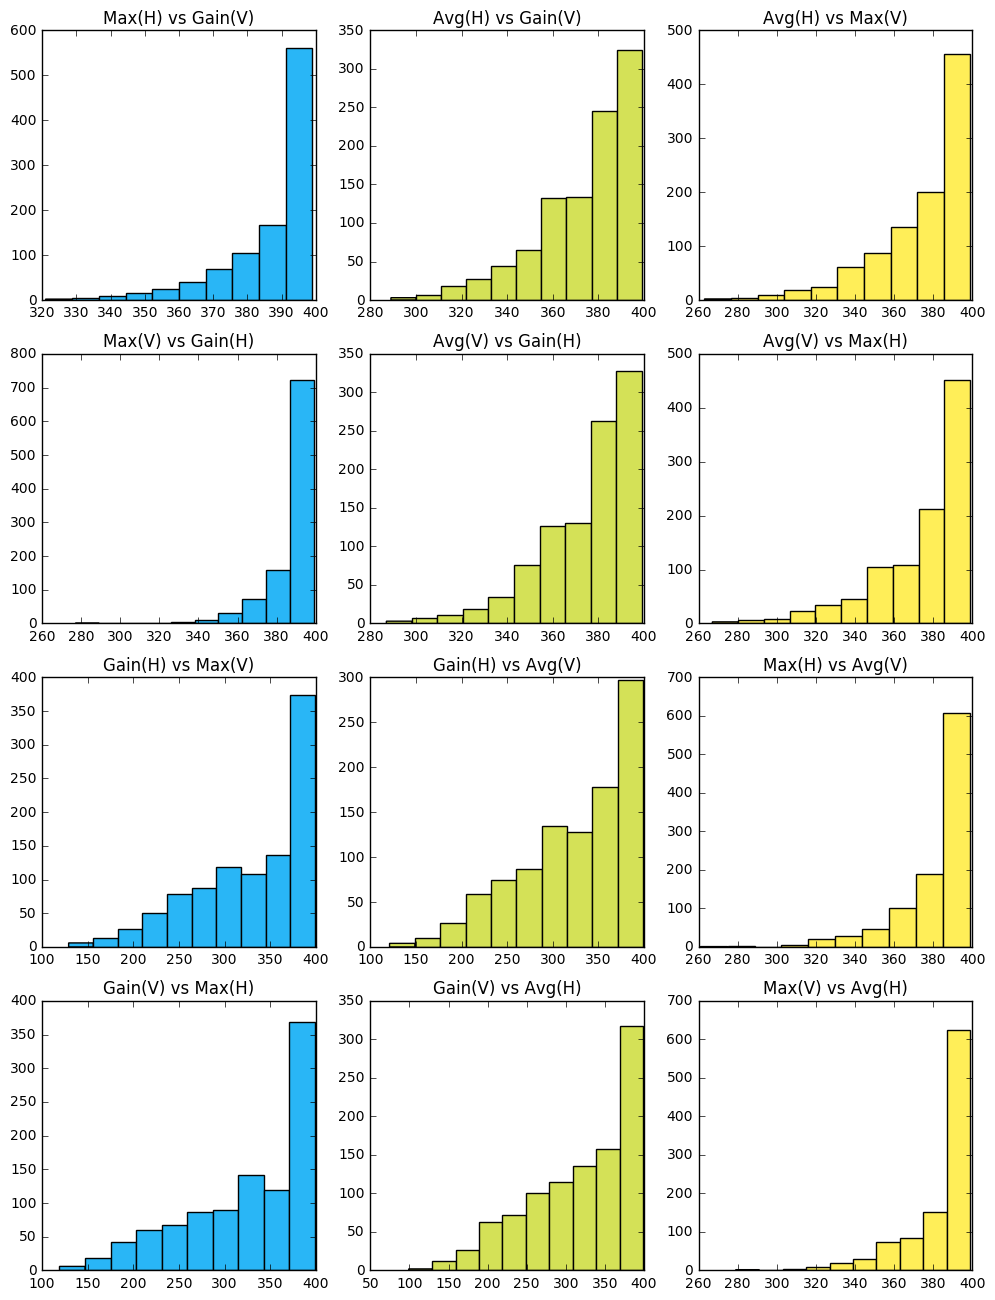

In [112]:
def process_turns(df, player1, player2, dir1, dir2):
    game_name = "{:s} - {:s} | {:s} - {:s}".format(player1, player2, dir1, dir2)
    df1 = df.loc[df['name'] == game_name]
    
    moves = df1['moves1'] + df1['moves2']
    return moves.values

r1 = process_turns(df, "Max", "Gain", "HORIZONTAL", "VERTICAL")
r2 = process_turns(df, "Max", "Gain", "VERTICAL", "HORIZONTAL")
r3 = process_turns(df, "Gain", "Max", "HORIZONTAL", "VERTICAL")
r4 = process_turns(df, "Gain", "Max", "VERTICAL", "HORIZONTAL")

r5 = process_turns(df, "Avg", "Gain", "HORIZONTAL", "VERTICAL")
r6 = process_turns(df, "Avg", "Gain", "VERTICAL", "HORIZONTAL")
r7 = process_turns(df, "Gain", "Avg", "HORIZONTAL", "VERTICAL")
r8 = process_turns(df, "Gain", "Avg", "VERTICAL", "HORIZONTAL")

r9 = process_turns(df, "Avg", "Max", "HORIZONTAL", "VERTICAL")
r10 = process_turns(df, "Avg", "Max", "VERTICAL", "HORIZONTAL")
r11 = process_turns(df, "Max", "Avg", "HORIZONTAL", "VERTICAL")
r12 = process_turns(df, "Max", "Avg", "VERTICAL", "HORIZONTAL")

f, ax = plt.subplots(4, 3, figsize=(12, 16))

ax[0,0].hist(r1, color='#29B6F6')
ax[0,0].set_title("Max(H) vs Gain(V)")
ax[1,0].hist(r2, color='#29B6F6')
ax[1,0].set_title("Max(V) vs Gain(H)")
ax[2,0].hist(r3, color='#29B6F6')
ax[2,0].set_title("Gain(H) vs Max(V)")
ax[3,0].hist(r4, color='#29B6F6')
ax[3,0].set_title("Gain(V) vs Max(H)")

ax[0,1].hist(r5, color="#D4E157")
ax[0,1].set_title("Avg(H) vs Gain(V)")
ax[1,1].hist(r6, color="#D4E157")
ax[1,1].set_title("Avg(V) vs Gain(H)")
ax[2,1].hist(r7, color="#D4E157")
ax[2,1].set_title("Gain(H) vs Avg(V)")
ax[3,1].hist(r8, color="#D4E157")
ax[3,1].set_title("Gain(V) vs Avg(H)")

ax[0,2].hist(r9, color="#FFEE58")
ax[0,2].set_title("Avg(H) vs Max(V)")
ax[1,2].hist(r10, color="#FFEE58")
ax[1,2].set_title("Avg(V) vs Max(H)")
ax[2,2].hist(r11, color="#FFEE58")
ax[2,2].set_title("Max(H) vs Avg(V)")
ax[3,2].hist(r12, color="#FFEE58")
ax[3,2].set_title("Max(V) vs Avg(H)")

plt.savefig('./hist_moves.png')